In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
# from copy import deepcopy
# import imutils
import re

FILES

In [3]:
# high flow
file1 = '23-07-26_schlieren-06_postprocess-01_fluoro-3to3mm-1525ccm'
file2 = '23-07-26_schlieren-05_postprocess-01_fluoro-2to3mm-1452ccm'
file3 = '23-07-28_schlieren-04_postprocess-01_fluoro-1to3mm-1067ccm'

# low flow
file4 = '23-07-28_schlieren-01_postprocess-02_fluoro-3to3mm-602ccm-flipped'
file5 = '23-07-28_schlieren-03_postprocess-01_fluoro-2to3mm-593ccm'
file6 = '23-07-28_schlieren-07_postprocess-02_fluoro-1to3mm-417ccm-trimmed' # takes long time to reach pure gas concentration

READ FILES

In [4]:
files = [file1, file2, file3, file4, file5, file6] # order
root = 'processed/'
ext = '.avi'
paths = [root+file+ext for file in files]
captures = [cv.VideoCapture(path) for path in paths]

In [5]:
def get_flowrate(file):
    return re.search('[0-9]*ccm', file).group(0)

data_labels = [get_flowrate(file) for file in files] 
data_labels

['1525ccm', '1452ccm', '1067ccm', '602ccm', '593ccm', '417ccm']

SELECT FRAME

In [6]:
def get_frame(capture, n):
    ii=0
    while ii<n:
        rtn, frame = capture.read()
        ii+=1
    return frame

In [7]:
t = 5 # seconds
fr = t*24
frames = [get_frame(capture, fr) for capture in captures]

DISPLAY FRAME

In [8]:
font = { #'weight' : 'bold',
        'size'   : 14,
        'horizontalalignment': 'center',
        'verticalalignment' : 'bottom'
       }

def show_frame(frame): # return plt
    plt.figure(figsize=(8,8), edgecolor='black', linewidth = 1.5)
    plt.imshow(frame, cmap='gray', vmin=0, vmax=255) # on scale 0-255!
    plt.axis('off')
    plt.text(750,1500,'1552 ccm', fontdict = font)
    return plt

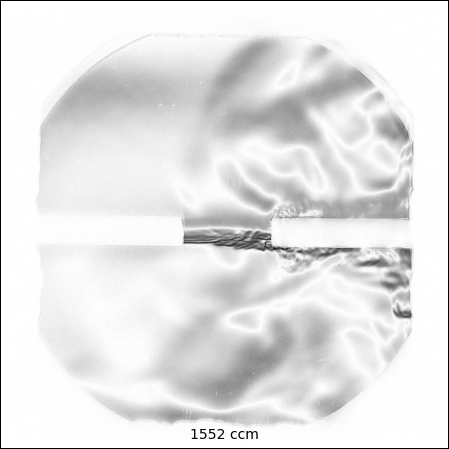

In [9]:
show_frame(frames[0]).show()

SAVE FIG

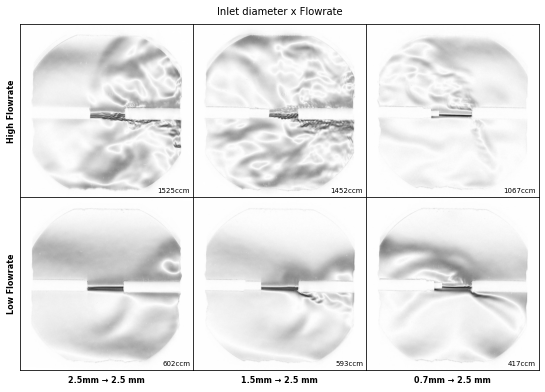

In [10]:
COL_LABELS = ['2.5mm \u2192 2.5 mm', 
              '1.5mm \u2192 2.5 mm', 
              '0.7mm \u2192 2.5 mm']

ROW_LABELS = ['High Flowrate',
              'Low Flowrate']

TITLE = 'Inlet diameter x Flowrate'

def make_figure(frames, data_labels): # on scale 0-255! returns plt
    
    font_axes = { 
        'weight' : 'bold',
        'size'   : 8,
        'horizontalalignment': 'center',
        'verticalalignment' : 'bottom'
       }
    font_text = { 
        'size'   : 7,
        'horizontalalignment': 'right',
        'verticalalignment' : 'bottom'
       }
    text_coords = (1475, 1475)
    fig, axes = plt.subplots(2,3)
    for ii, ax in enumerate(axes.flat): # put frames
        ax.imshow(frames[ii], cmap= 'gray', vmin=0, vmax=255)
        ax.text(text_coords[0], text_coords[1], data_labels[ii], fontdict = font_text)
#         ax.set_aspect("auto") # careful will stretch image

    for ax in axes.flat: # remove axes px values
        ax.set_xticks([])
        ax.set_yticks([])
    
    # labels    
    axes[0,0].set_ylabel(ROW_LABELS[0], fontdict = font_axes)
    axes[1,0].set_ylabel(ROW_LABELS[1], fontdict = font_axes)
    axes[1,0].set_xlabel(COL_LABELS[0], fontdict = font_axes, labelpad=15)
    axes[1,1].set_xlabel(COL_LABELS[1], fontdict = font_axes, labelpad=15)
    axes[1,2].set_xlabel(COL_LABELS[2], fontdict = font_axes, labelpad=15)

    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    fig.patch.set_facecolor('white')
    
    subplotdim=3
    fig.set_size_inches(subplotdim*3,subplotdim*2) # a4 fit
    mid = (fig.subplotpars.right + fig.subplotpars.left)/2
    fig.suptitle(TITLE, fontsize=10, y =0.94)
    fig.subplots_adjust(top=0.9, left=0.1, right= 0.9, bottom = 0.1)
    return plt

make_figure(frames, data_labels).show()

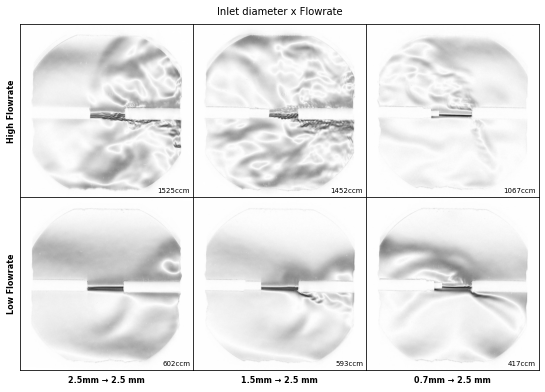

In [11]:
make_figure(frames, data_labels).savefig('fig1.png', dpi=900, bbox_inches = 'tight')